<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2022.06.19 일

In [6]:
#install.packages(c("skimr","dplyr","DataExplorer", "pacman"))
pacman::p_load("skimr","dplyr","DataExplorer")

In [16]:
system("gdown --id 1HzCy8hFuSZ2uQHMkssx8HxcrM6enAd_6")

In [120]:
train=read.csv("train.csv" ,stringsAsFactors=TRUE)
test=read.csv("test_x.csv", stringsAsFactors=TRUE)

In [19]:
skim(train)

── Data Summary ────────────────────────
                           Values
Name                       train 
Number of rows             35515 
Number of columns          22    
_______________________          
Column type frequency:           
  numeric                  22    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable        n_missing complete_rate    mean    sd p0 p25 p50 p75
 1 Diabetes_binary              0             1  0.140  0.347  0   0   0   0
 2 HighBP                       0             1  0.429  0.495  0   0   0   1
 3 HighChol                     0             1  0.426  0.494  0   0   0   1
 4 CholCheck                    0             1  0.962  0.191  0   1   1   1
 5 BMI                          0             1 28.5    6.72  13  24  27  31
 6 Smoker                       0             1  0.446  0.497  0   0   0   1
 7 Stroke                       

In [ ]:
skim(test)

In [122]:
#plot_intro(train)
#컬럼명 변경 
names(train) <- tolower(names(train))
#names(train)

주관적 건강인식 평균값과 BMI의 평균의 합을 각 성별에 따라 구한 뒤, 그 차이 구히걸

In [63]:
train %>% group_by(sex) %>% mutate(genhlth_mean=mean(genhlth),
                                   bmi_mean=mean(bmi) ) %>%
                            summarise(genhlth_meanofsum=sum(genhlth_mean) , 
                                     bmi_meanofsum=sum(bmi_mean),
                                     ANSWER=    abs(genhlth_meanofsum- bmi_meanofsum)
                                    ) 
                            

sex,genhlth_meanofsum,bmi_meanofsum,ANSWER
<int>,<dbl>,<dbl>,<dbl>
0,50439,563142,512703
1,39104,447470,408366


BMI 이상치가 있을 때의 값의 평균값과 이상치를 제거하여 결측치로 바꿨을 때의 평균값의 차이를 구할 것 (결측치는 그대로 두기)


In [40]:
quantile(train$BMI, probs = c( 0.25, 0.75 ))

25% 75% 
 24  31

In [47]:
train$BMI_new = ifelse(train$BMI<24,NA, 
                                        ifelse(train$BMI>31, NA,  train$BMI ))

In [53]:
train %>% summarise(mean(BMI)- mean(BMI_new, na.rm=TRUE ))

"mean(BMI) - mean(BMI_new, na.rm = TRUE)"
<dbl>
1.256426


정신건강 안좋았던 일수와 신체건강 안좋았던 일수의 합을 구한 뒤 연 소득수준에 따라 가장 높은 소득구간과 가장 낮은 소득 구간을 구할 것<br>
소득 구간별로 정신 + 신체건강 안좋았던 일수의 합의 평균을 구한 뒤, 이 값이 가장 높은 소득 구간과 가장 낮은 소득구간을 구하시면 됩니다


In [57]:
'menthlth''physhlth'

In [72]:
train %>% group_by(income) %>% 
         # mutate_at(vars(menthlth,physhlth), sum) %>%
          summarise(sumofmean= sum( menthlth,physhlth )%>%mean ) %>%
          arrange(-sumofmean)

income,sumofmean
<int>,<dbl>
8,54087
6,35778
7,34655
4,31877
5,30338
3,29047
1,27637
2,26686


1. 이상치 제거: 연속형 변수들의 이상치를 NA로 처리
2. 결측치 대체: NA를 적절한 값으로 대체하기 (e.g., mean, median)
3. 범주형 변수, 연속형 변수는 변수형태에 알맞게 처리
4. 로지스틱, randomforest 등 자신이 자신있는 알고리즘 사용하여 모델링
train데이터 제공. train 후 모델링하여 predict 했을 때 당뇨라고 예측할 확률 제출

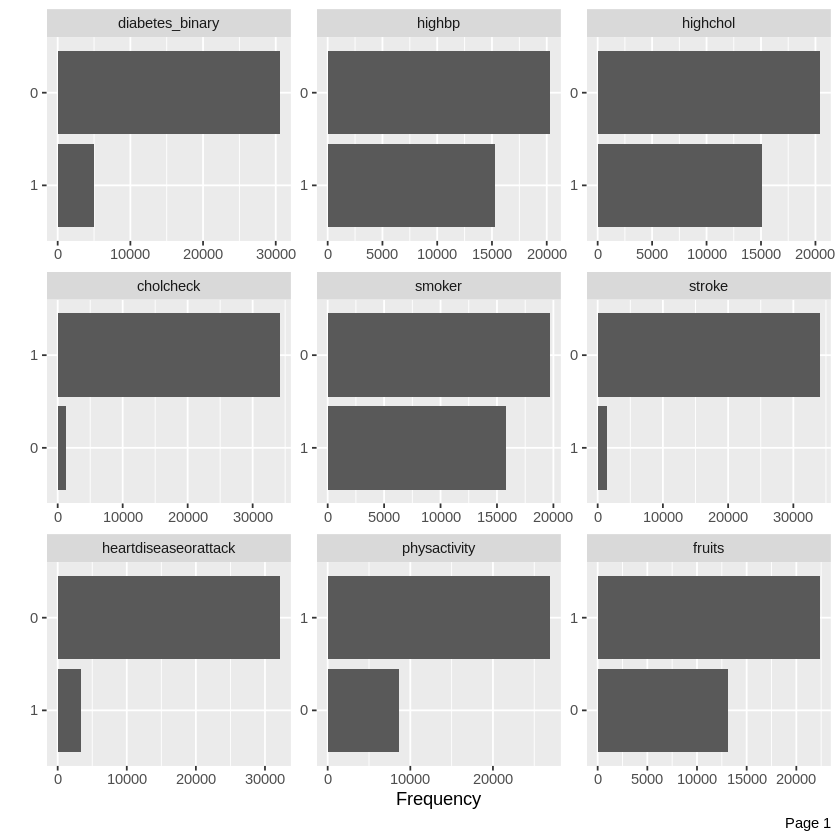

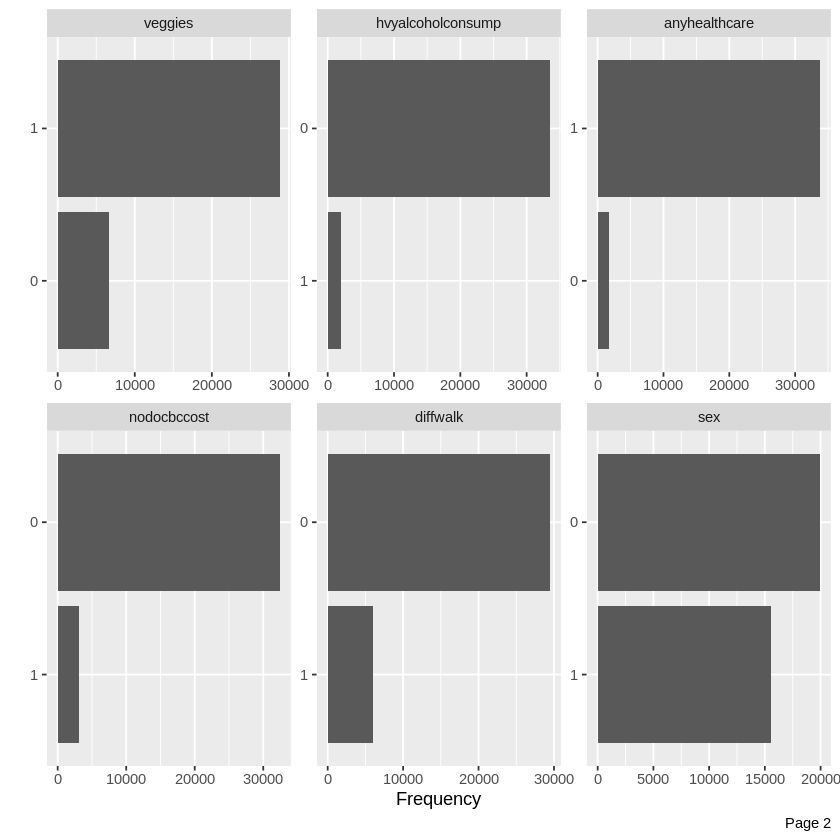

In [75]:
#범주형 변수 확인 
plot_bar(train)

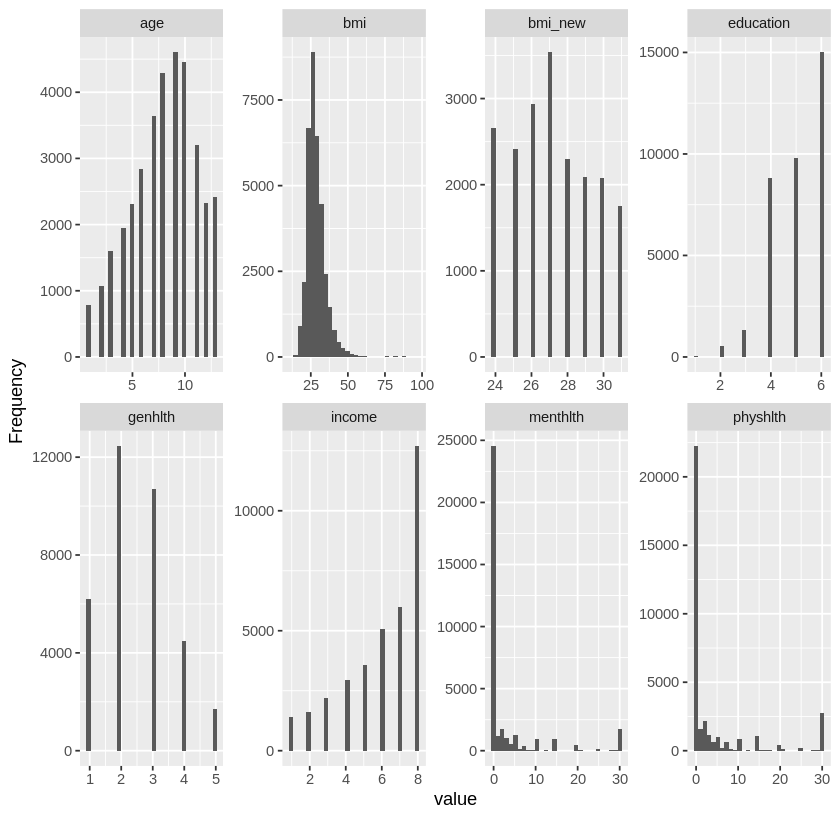

In [74]:
plot_histogram(train)

In [ ]:
#colnames(train)
#plot_boxplot(train, by="diabetes_binary")

In [80]:
table(train$menthlth)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
24539  1194  1743  1062   527  1269   139   417    83    18   914     4    57 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
    6   149   764    11     3     7     3   500    31    14     7     5   171 
   26    27    28    29    30 
    3    15    47    25  1788 

In [81]:
quantile(train$menthlth)

0%  25%  50%  75% 100% 
   0    0    0    2   30

In [93]:
table(train$physhlth)
quantile(train$physhlth)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
22249  1590  2146  1169   622  1020   165   672   102    22   845     8    82 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   10   354   720    21    16    20     2   446   111     8     9    14   194 
   26    27    28    29    30 
    8    11    71    26  2782 

0%  25%  50%  75% 100% 
   0    0    0    3   30

#정리 
1. `physhlth`, `menthlth` : 0, 1-5, 6-10, 11-15, 16-20, 21-25, 26-30 -> 7개로 범주 재조정
2. bmi만 conti로 간주
3. 민맥스놈
4. 타켓 불균형 -> SMOTE 샘플링
5. 랜포


## 1. 범주형 

In [94]:
# 함수생성
cat= function(x){
  x=case_when(x==0 ~ 0,
              x>=1 & x<=5 ~ 1,
              x>=6 & x<=10 ~ 2,
              x>=11 & x<=15 ~ 3,
              x>=16 & x<=20 ~ 4,
              x>=21 & x<=25 ~ 5,
              x>=26 & x<=30 ~ 6
              )
}

In [123]:
#install.packages("magrittr") ; library(magrittr )
#train %>% mutate_at(vars(physhlth, menthlth), funs(cat)  )  %>% select (physhlth, menthlth) %>% table 
train %<>% mutate_at(vars(physhlth, menthlth), funs(cat)  )

## 연속형

In [107]:
# 이상치 제거
#1. 함수 생성(테스트에도 적용하려고)
outliers=function(x){
                x= ifelse(x<24, NA,
                                   ifelse(x>31, NA, x )
                          )
                          }

In [109]:
train %<>% mutate_at(vars(bmi), funs(outliers))

In [114]:
#write.csv(train, "train_colab.csv", row.names=FALSE)

In [124]:
#임퓨테이션
#install.packages("mice"); library(mice)
#m=5
#result = mice(train, m=m, method="cart", seed=2022, print=FALSE)
#densityplot(result)
#느려서 pass
#함수 다시 생성
#1.
outliers=function(x){
                x= ifelse(x<24, 24,
                                   ifelse(x>31, 31, x )
                          )
                          }


In [ ]:
train %<>% mutate_at(vars(bmi), funs(outliers))

민맥스놈

In [ ]:
install.packages("caret"); library(caret)
#min_max_norm=preProcess(train, method=c("range"))
#train=predict(min_max_norm, train)

샘플링

In [126]:
#install.packages("ROSE"); library(ROSE)
train_rose <- ROSE(diabetes_binary~., data=train, seed=2022)$data


In [128]:
table(train_rose$diabetes_binary)


    0     1 
17643 17872 

In [ ]:
str(train_rose)

모델링

In [ ]:
#install.packages("randomForest"); library(randomForest)
rf= randomForest(diabetes_binary ~. ,  data=train_rose)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
